<a href="https://colab.research.google.com/github/RMYazdi/Reza_Sample_Code/blob/main/data_incubator_code_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Question


In [ ]:
#download data
# cd /content/drive/MyDrive/Data_incubator
# !wget --progress=bar:force https://dataincubator-challenge.s3.amazonaws.com/data-challenge-boston_311_calls/boston_311_calls.csv
# !wget --progress=bar:force https://dataincubator-challenge.s3.amazonaws.com/data-challenge-boston_311_calls/boston_population_by_zip.csv
# !wget --progress=bar:force https://dataincubator-challenge.s3.amazonaws.com/data-challenge-boston_311_calls/boston_02128_garbage_schedule.csv

In [ ]:
import numpy as np
import pandas as pd 

##Data preparation

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Data_incubator/boston_311_calls.csv")
df.fillna("n",inplace=True)
df['police_district'] = df['police_district'].str.replace('-', '')
df['zip_code'] = df['location'].str.extract(r'\b(\d{5})\b')
df.fillna("n",inplace=True)
df['datetime'] = pd.to_datetime(df['open_dt'])
df['request_weekday'] =df['datetime'].apply(lambda x: x.weekday()).values


df_zip_code=pd.read_csv("/content/drive/MyDrive/Data_incubator/boston_population_by_zip.csv", dtype={'Zip Code': str})
df_zip_code.fillna("n",inplace=True)


df_garbage=pd.read_csv("/content/drive/MyDrive/Data_incubator/boston_02128_garbage_schedule.csv")
df_garbage.fillna("n",inplace=True)


##Question 1.1 and 1.2

1.1 **How many rows are in the data set**?

1.2 **What fraction of calls in this data set deal with traffic**? A complaint is considered to deal with traffic if it has the word "traffic" present in the value of the "case_title" column.

In [ ]:
print(df.shape[0])

1932760


In [ ]:
count = df['case_title'].str.contains('traffic').sum()
print(count/df.shape[0])

3.621763695440717e-06


##Question 1.3


1.3 Each call is assigned a police district. **Compute how many calls are on average assigned to each police district every year**. What is the median of this average annual number of calls per police district? The date of the call is in column "open_dt" and the assigned police district is in column "police_district". Be careful though, the "police_district" column will need some cleaning. As an example, the same district may sometimes be logged as "B2" and other times as "B-2".



In [ ]:
df['police_district'] = df['police_district'].str.replace('-', '')

# convert 'open_dt' to a datetime column and extract the year
df['year'] = pd.to_datetime(df['open_dt']).dt.year

# group by 'police_district' and 'year' and compute the count of calls
grouped = df.groupby(['police_district', 'year']).size().reset_index(name='count')

# compute the mean count of calls per year for each police district
mean_calls = grouped.groupby('police_district')['count'].mean()

# compute the median of the mean counts
median_mean_calls = mean_calls.median()

# print the results
print(mean_calls)
print(median_mean_calls)

police_district
A1     18125.000000
A15     5379.416667
A7      9867.583333
B2     16004.583333
B3     10619.500000
C11    17950.250000
C6     15095.500000
D14    12767.916667
D4     23007.750000
E13    10677.250000
E18     9466.000000
E5     12033.250000
n         69.333333
Name: count, dtype: float64
12033.25


##Question 1.4

1.4 **How does the number of received calls in a given ZIP code correlate to ZIP code population? Calculate the Pearson correlation coefficient of the number of calls received for each ZIP code with the ZIP code population.** To compute this, you will first need to extract the ZIP code of each call from the "location" column. A CSV file with the population data for each ZIP code can be downloaded here. Exclude ZIP codes that do not have more than 100 calls in this data set.

In [ ]:
import pandas as pd
import numpy as np


# merge the call data with the population data using the ZIP code as the key
merged = pd.merge(df, df_zip_code, left_on='zip_code', right_on='Zip Code')

# exclude ZIP codes with less than 100 calls
grouped = merged.groupby('Zip Code').filter(lambda x: len(x) >= 100)

# compute the Pearson correlation coefficient between the number of calls and the population
merged_df = pd.merge(grouped[['Zip Code','Population']].groupby("Zip Code").min(), grouped['zip_code'].value_counts().to_frame(), left_index=True, right_index=True)

# correlation=np.corrcoef(merged_df["Population"],merged_df["zip_code"])

correlation=merged_df["Population"].corr(merged_df["zip_code"])

# print the result
print(correlation)

0.864303121385204


##question 1.5

1.5 We can determine the total number of calls received each year and notice a general increase over time. We can visualize this trend by plotting the annual number of calls as a function of time. What is the increase in calls for each year? Estimate the increase using a line of best fit.


In [ ]:
from scipy.stats import linregress
linregress()

The estimated increase in calls per year is 15012.82.


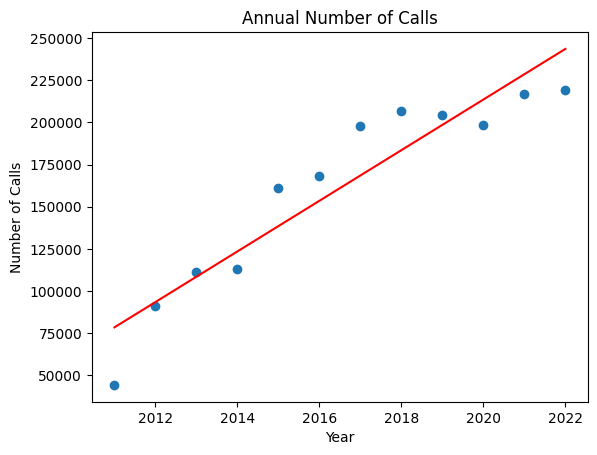

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# convert the "open_dt" column to a datetime object and extract the year
df['year'] = pd.to_datetime(df['open_dt']).dt.year

# group the data by year and count the number of calls in each year
calls_by_year = df.groupby('year').size()

# plot the annual number of calls as a function of time
plt.plot(calls_by_year.index, calls_by_year.values, 'o')

# compute the line of best fit using linear regression
slope, intercept, r_value, p_value, std_err = linregress(calls_by_year.index, calls_by_year.values)

# add the line of best fit to the plot
plt.plot(calls_by_year.index, intercept + slope * calls_by_year.index, 'r')

# add labels and a title to the plot
plt.xlabel('Year')
plt.ylabel('Number of Calls')
plt.title('Annual Number of Calls')

# print the estimated increase per year
print(f"The estimated increase in calls per year is {slope:.2f}.")


##question 1.6


1.6 We would like to determine on average how many days after garbage collection are requests for street cleaning made. Let's focus only on service requests from ZIP code "02128" that have "Requests for Street Cleaning" listed in the "type" column. Getting the ZIP code of each call will again require extracting it from the "location" column. Now determine the day of garbage collection for each request location by using the "latitude" and "longitude" columns and finding the collection point in this data set that is closest to it (use Euclidean distance as a measure of distance between two locations). Column "trashday" in the garbage collection data set contains information about the week day that garbage is collected. On average how many days after a garbage collection are requests for street cleaning made? Please provide the script used to compute your response (max 10000 characters).

In [ ]:
def euclidean_distance(lat1, lon1, lat2, lon2):
    return np.sqrt((lat1 - lat2)**2 + (lon1 - lon2)**2)

street_cleaning = df[(df['zip_code'].str.contains('02128')) & (df['type'] == 'Requests for Street Cleaning')]

street_cleaning.reset_index()

# Calculate the distance between each street cleaning request and each garbage collection location
distances = euclidean_distance(street_cleaning['latitude'].values[:,np.newaxis], street_cleaning['longitude'].values[:,np.newaxis],
                               df_garbage['latitude'].values, df_garbage['longitude'].values)


In [ ]:
import numpy as np

# Define a function to calculate Euclidean distance between two sets of coordinates
def euclidean_distance(lat1, lon1, lat2, lon2):
    return np.sqrt((lat1 - lat2)**2 + (lon1 - lon2)**2)

# Filter the data to only include street cleaning requests in ZIP code "02128" with "Requests for Street Cleaning" type
street_cleaning = df[(df['zip_code'].str.contains('02128')) & (df['type'] == 'Requests for Street Cleaning')]

street_cleaning.reset_index()

# Calculate the distance between each street cleaning request and each garbage collection location
distances = euclidean_distance(street_cleaning['latitude'].values[:,np.newaxis], street_cleaning['longitude'].values[:,np.newaxis],
                               df_garbage['latitude'].values, df_garbage['longitude'].values)



# Map integer weekday values to string values
week_dic={'Monday': 0,
 'Tuesday': 1,
 'Wednesday': 2,
 'Thursday': 3,
 'Friday': 4,
 'Saturday': 5,
 'Sunday': 6}


nearest_garbage_index = np.argmin(distances, axis=1)


df_garbage['request_weekday'] = df_garbage['trashday'].map(lambda x:week_dic[x])

# Find the index of the nearest garbage collection location for each street cleaning request

# Get the date of the nearest garbage collection for each street cleaning request
street_cleaning.loc[:, 'garbage_date'] = df_garbage.loc[nearest_garbage_index]['request_weekday'].values

# Calculate the average number of days since garbage collection for all street cleaning requests in ZIP code "02128"
def neg_transform(x):
  if x<0:
    return 7+x
  else:
    return x 

days_since_garbage = (street_cleaning['request_weekday'] - street_cleaning['garbage_date']).map(neg_transform).mean()

print("On average, requests for street cleaning are made {} days after a garbage collection.".format(days_since_garbage))
